In [62]:
import copy

import numpy as np
import scipy
from matplotlib import pyplot as plt

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [68]:

N0 = 100
N1 = 100
N_total = N0+N1

f_mat = np.zeros((3, N_total))
f_mat[0,:] = np.concatenate((np.random.randn(N0), np.zeros(N1)))
f_mat[1,:] = np.concatenate((np.zeros(N0), np.random.randn(N1)))
f_mat[2,:] = (f_mat[0,:]+f_mat[1,:])*0


In [69]:
f_mat[0,:].shape

(200,)

In [70]:
num_neurons = 100
num_dim = 3

#define random orthogonal dimensions in neural activity
Q,R = np.linalg.qr(np.random.randn(num_neurons, num_dim))

In [71]:
X = np.zeros((num_neurons,N_total))
for i in range(num_dim):
    X+= Q[:,i].reshape((-1,1))@f_mat[i,:].reshape((1,-1))


<IPython.core.display.Javascript object>


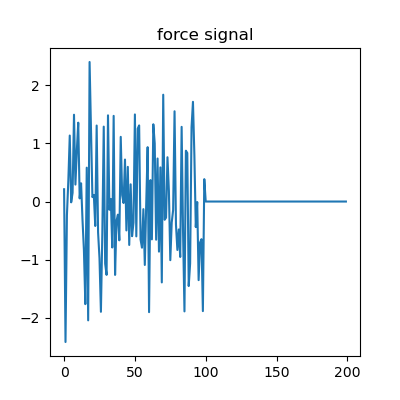

<IPython.core.display.Javascript object>


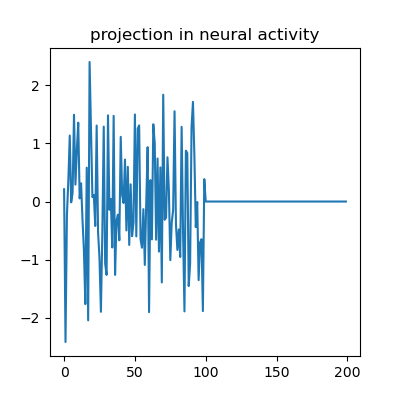

Text(0.5, 1.0, 'projection in neural activity')

In [72]:
#Verify construction of neural activity
i = 0

plt.figure(figsize=(4,4))
plt.plot(f_mat[i,:])
plt.title('force signal')

proj = Q[:,i]@X
plt.figure(figsize=(4,4))
plt.plot(proj)
plt.title('projection in neural activity')

In [73]:
np.linalg.matrix_rank(X)

2

In [74]:
#X: n_samples X n_features
#y: n_samples

y = f_mat[0,:]

# clf = LinearRegression().fit(X.T, f1_)
clf = Ridge(alpha=1e-1).fit(X.T, y)#, sample_weight=sample_weight)
# clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 1e1]).fit(X.T, f1) # , sample_weight=sample_weight)
print(clf.score(X[:,N0:].T, y[N0:]))
print(clf.score(X[:,:N0].T, y[:N0]))

c0 = clf.coef_

0.0
0.9999990379761842


In [75]:
#X: n_samples X n_features
#y: n_samples

y = f_mat[1,:]

# clf = LinearRegression().fit(X.T, f1_)
clf = Ridge(alpha=1e-1).fit(X.T, y)#, sample_weight=sample_weight)
# clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 1e1]).fit(X.T, f1) # , sample_weight=sample_weight)
print(clf.score(X[:,N0:].T, y[N0:]))
print(clf.score(X[:,:N0].T, y[:N0]))

c1 = clf.coef_

0.9999992435506729
0.0


In [76]:
c0_n = c0/np.linalg.norm(c0)
c1_n = c1/np.linalg.norm(c1)
c0_n@c1_n

-2.311784993019872e-06

In [77]:
model_angle = scipy.linalg.subspace_angles(c0_n.reshape((-1,1)), c1_n.reshape((-1,1)))[0]*180/np.pi
model_angle

89.99986754447676

In [78]:
clf.predict(X[:N0].T)

array([-3.09257329e-05, -2.78932600e-05, -3.04125553e-05, -3.11004288e-05,
       -3.19919366e-05, -3.06662789e-05, -3.08549894e-05, -3.24052519e-05,
       -3.10183649e-05, -3.16974625e-05, -3.22473837e-05, -3.07439918e-05,
       -3.10432785e-05, -3.03210417e-05, -2.97173928e-05, -2.86449214e-05,
       -3.13543516e-05, -2.83230085e-05, -3.34520149e-05, -3.21192830e-05,
       -3.07700072e-05, -3.08131295e-05, -3.01965488e-05, -3.21905138e-05,
       -3.00707288e-05, -2.95555202e-05, -2.84928610e-05, -3.00561613e-05,
       -3.21688024e-05, -2.94486099e-05, -2.92258269e-05, -3.23930400e-05,
       -3.05187567e-05, -3.07337286e-05, -2.97696867e-05, -3.23825982e-05,
       -2.92251369e-05, -3.02993778e-05, -3.04212905e-05, -2.99116637e-05,
       -3.19660072e-05, -3.08099054e-05, -3.06523317e-05, -3.15155083e-05,
       -3.01082831e-05, -3.13702420e-05, -2.98197077e-05, -3.10237689e-05,
       -2.99940236e-05, -3.02637808e-05, -3.24109377e-05, -2.99902945e-05,
       -3.21295166e-05, -

In [ ]:
for i in range(num_dim):
    print(i)
    print(c@Q[:,i])
    print('')

In [47]:
for i in range(num_dim):
    print(i)
    print(c@Q[:,i])
    print('')

0
-0.3329069089992545

1
0.6661347077146607

2
0.3332277987153093



### Test:

In [58]:
tmp0 = np.array((-0.33, 0.66, 0.33))
tmp0 = tmp0/np.linalg.norm(tmp0)

tmp1 = np.array((0.66, -0.33, 0.33))
tmp1 = tmp1/np.linalg.norm(tmp1)

In [59]:
tmp1@tmp2

0.8083316151184488

In [58]:
# clf = Ridge(alpha=C, max_iter=max_iter).fit(D['x', tt], D['y', tt])

In [14]:
# plt.figure()
# plt.hist(f1)